![](https://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg)

# Project 1: [Titanic](https://www.kaggle.com/c/titanic/data)
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this project, you will exercise your skills with loading data, python data structures, and Pandas to identify charactaristics of Titanic survivors!

---
#### Your goals should be to:
* Practice python programming including loops, conditionals, types, functions, and data structures
* Start thinking critically about manipulating, organizing, and interpreting data
* Troubleshoot errors

---
#### Getting Started:
* **fork** the repository on git.generalassemb.ly
* **clone** your forked repo

---
#### Submission:
* You should be working on a **fork** of the GA project one repository. 
* Use **git** to manage versions of your project. Make sure to `add`, `commit`, and `push` your changes to **your fork** of the github 
* Submit a link to your project repository in the submission form by **Friday, 9/29 11:59 PM**. You will then receive the solutions.
* Create a copy of your original notebook (file > make a copy in jupyter notebook)
* In the copy, use the solutions to correct your work. Make sure to take note of your successes and struggles. Did you learn anything new from correcting your work?
* Submit the corrected version by **Sunday, 10/1 11:59 PM** to receive instructor feedback on your work. ***Projects submitted after this deadline will not receive instructor feedback.***

### Considerations:

* You will be generating long data strutures- avoid displaying the whole thing. Display just the first or last few entries and look at the length or shape to check whether your code gives you back what you want and expect.
* Make functions whenever possiblle!
* Be explicit with your naming. You may forget what `this_list` is, but you will have an idea of what `passenger_fare_list` is. Variable naming will help you in the long run!
* Don't forget about tab autocomplete!
* Use markdown cells to document your planning, thoughts, and results. 
* Delete cells you will not include in your final submission
* Try to solve your own problems using this framework:
  1. Check your spelling
  2. Google your errors. Is it on stackoverflow?
  3. Ask your classmates
  4. Ask a TA or instructor
* Do not include errors or stack traces (fix them!)

# 1. Using the `with open()` method in the `csv` library, load the titanic dataset into a list of lists.

* The `type()` of your dataset should be `list`
* The `type()` of each element in your dataset should also be `list`
* The `len()` of your dataset should be 892 (892 rows, including the header)
* The `len()` of each row element in your dataset should be have a `len()` of 12
* Print out the first 3 rows including the header to check your data.

In [1]:
import csv
from IPython.display import display
import numpy as np

In [2]:
def change_delim(line):
    '''
    Flips all delimiters not in quoted text to pipes
    '''
        name_delim_flag = False
        return_line = ''
        for line_char in line:
            if line_char == '"':
                name_delim_flag = not name_delim_flag
            elif line_char == ',' and name_delim_flag == False:
                return_line += '|'
            else:
                return_line += line_char
                
        return return_line

In [3]:
raw_ds = ''
titanic_file = 'titanic.csv'
with open(titanic_file, 'r') as f:
    raw_ds = f.read()

ds_line = raw_ds.split('\n')

titanic_ds = []
count = 0
for line in ds_line:
    if count < 3:
        print(line)
        
    count += 1
    if line != '':
        line_mod = change_delim(line)
        titanic_ds.append(line_mod.split('|'))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C


# 2. Separate the first header row from the rest of your dataset. 

* The header should be a list of the column names
* The data should be the rest of your data
* Display the header and the first row of the dataset zipped together using `zip`
* Your result should look like...


```
[('PassengerId', '1'),
 ('Survived', '0'),
 ('Pclass', '3'),
 ...
 ('Embarked', 'S')]
 ```

In [4]:
# Your code here
header = titanic_ds[0]
data = [list(zip(header, titanic_ds[i])) for i in range(1, len(titanic_ds))]

# 3. Using a `for` loop, load your data into a `dict` called `data_dict`.

* The keys of your `data_dict` should be `PassengerId`
* The values of your `data_dict` should be dictionaries...
  * Each of these dictionaries should reperesent a column value within a row
  * The keys should be the names of the columns
  * The values should be the values of that column
  
The beginning of your `data_dict` should look like: 

    {'1': {'Age': '22',
      'Cabin': '',
      'Embarked': 'S',
      'Fare': '7.25',
      'Name': 'Braund, Mr. Owen Harris',
      'Parch': '0',
      'Pclass': '3',
      'Sex': 'male',
      'SibSp': '1',
      'Survived': '0',
      'Ticket': 'A/5 21171'},
     '10': {'Age': '14',
      'Cabin': '',
      'Embarked': 'C',
      'Fare': '30.0708',
      'Name': 'Nasser, Mrs. Nicholas (Adele Achem)',
      'Parch': '0',
      'Pclass': '2',
      'Sex': 'female',
      'SibSp': '1',
      'Survived': '1',
      'Ticket': '237736'},
      ...
      }

In [5]:
data_dict = {}

for data_element in list(data):
    data_dict_key = ''
    inner_dict = {}
    for data_list_tuple in data_element:
        if data_list_tuple[0] == 'PassengerId':
            data_dict_key = data_list_tuple[1]
        else:
            inner_dict[data_list_tuple[0]] = data_list_tuple[1]
    
    data_dict[data_dict_key] = inner_dict

# 4. Repeat step 3 using a dictionary comprehension.

* Using `==`, check if your `data_dict` from your `for` loop is the same as the one from your dictionary comprehension.

In [6]:
key_list = [value for element in data for key, value in element if key == 'PassengerId']
value_dict = [{key2: value2 for key2, value2 in element2 if key2 != 'PassengerId'} for element2 in data]

data_dict_comp = dict(list(zip(key_list, value_dict)))

# 5. Transform your `data_dict` to be oriented by column and call it `data_dict_columns`

* Currently, our `data_dict` is oriented by row, indexed by `"PassengerId"`. 
* Transform your data so that the title of each row is a key, the values are of type `list` and represent column vectors.

If you display `data_dict_columns`, the beginning should look like...

    {'Age': ['25',
      '36',
      '24',
      '40',
      '45',
      '2',
      '24',
      '28',
      '33',
      '26',
      '39',
      ...

In [7]:
data_dict_columns = {key : [] for key in header}

for k, v in data_dict_comp.items():
    data_dict_columns['PassengerId'].append(k)
    for k2, v2 in v.items():
        data_dict_columns[k2].append(v2)

# 6. Data Types

What is the current `type` of each column? What do you think the data type of each column *should* be? The data types in Python are...

* `int`
* `float`
* `str`
* `bool`
* `tuple`
* `list`
* `dict`
* `set`

In a markdown cell, describe what each column represents and what the `type` of each value should be. **Extra:** If you want to be fancy, use a [markdown table](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables) to display your results.

In [8]:
for key, value in data_dict_columns.items():
    print ("Column", key, "has the following class:", type(value[0]))

Column PassengerId has the following class: <class 'str'>
Column Survived has the following class: <class 'str'>
Column Pclass has the following class: <class 'str'>
Column Name has the following class: <class 'str'>
Column Sex has the following class: <class 'str'>
Column Age has the following class: <class 'str'>
Column SibSp has the following class: <class 'str'>
Column Parch has the following class: <class 'str'>
Column Ticket has the following class: <class 'str'>
Column Fare has the following class: <class 'str'>
Column Cabin has the following class: <class 'str'>
Column Embarked has the following class: <class 'str'>


#### Your answer here (double click here to edit this markdown cell, and press shift-enter exit edit mode!): 

##### <font color='green'>Andy's response: All columns are lists of strings.

# 7. Transform each column to the appropriate type if needed.

Build a function called `transform_column` that takes arguments for a `data_dict`, `column_name`, and `datatype`, and use it to transofm the columns that need transformation.

**NOTE:** There are values in this dataset that cannot be directly cast to a numerical value. Use `if/then` or `try/except` statements to handle errors. 

**To help identify potential sources of errors, explore the `set` of values in each column.**

In [10]:
def transform_column(data_dict, column_name, datatype):
    temp_list = []
    try:
        for element in data_dict[column_name]:
            if element != '':
                temp_list.append(datatype(element))
            else:
                temp_list.append(datatype('-1'))  # Assigns null or invalid values to be -1, to be excluded from later analysis
        
        data_dict[column_name] = temp_list
    except:
        print("Could not transform column", column_name, "to", datatype)



# 8. Build functions to calculate the mean, sample standard deviation, and median of a list of ints or floats. Use `scipy.stats.mode` or build your own mode function!


If you filled any missing values with `np.NaN`, you may need to handle that in your functions (look up `np.isnan()`).

If building a `mode` function is too difficult, you import mode from `scipy.stats` using `from scipy.stats import mode`.

**Optional:**  Build a function for calculating the Mode that returns the mode value *and* the count of that value. Mode is tricky, so start by building a function that counts the occurances of each value. You may also need to sort using a `key` with a `lambda function` inside. You may also find a `defaultdict` useful.

Mean

In [11]:
def valid_data(data_list):
        temp_data = []
        for element in data_list:
            if element >= 0:
                temp_data.append(element)
        
        return temp_data

def this_mean(data_list):
    try:
        temp_data = valid_data(data_list)
        data_sum = sum(temp_data)
        data_size = len(temp_data)
        return data_sum / data_size
    except:
        print("Mean could not be calculated")
        return -1

Standard Deviation

In [12]:
def this_std(data_list):
    try:
        temp_data = valid_data(data_list)
        sum_diff_of_sq = 0
        data_size = len(temp_data)
        data_mean = this_mean(temp_data)
        
        for element in temp_data:
            diff_of_sq = (element - data_mean) ** 2
            sum_diff_of_sq += diff_of_sq
            
        return (sum_diff_of_sq / data_size) ** 0.5
    except:
        print("Standard deviation could not be calculated")
        return -1

Median

In [13]:
def this_median(data_list):
    try:
        temp_list = valid_data(data_list)
        list_size = len(temp_list)

        temp_list.sort()
        midpoint = int(list_size / 2)

        if list_size % 2 == 1:
            return temp_list[midpoint]
        else:
            return this_mean(temp_list[midpoint-1:midpoint+1])
    except: 
        print("Median could not be calculated")
        return -1

Mode

In [14]:
from scipy.stats import mode

def this_mode(data_list):
    try:
        temp_list = valid_data(data_list)
        return mode(temp_list)
    except:
        print("Mode could not be calculated")
        return -1

# 9. Summary Statistics of Numerical Columns

For numerical columns, what is the mean, standard deviation, mean, and mode for that data? Which measure of central tendency is the most descriptive of each column? Why? Explain your answer in a markdown cell.

In [15]:
for element in ['Survived', 'Fare', 'Age']:
    print(element, 'statistics:')
    print('--------------------')
    print('Mean:', this_mean(data_dict_columns[element]))
    print('Standard deviation:', this_std(data_dict_columns[element]))
    print('Median:', this_median(data_dict_columns[element]))
    print(this_mode(data_dict_columns[element]))
    print()

Survived statistics:
--------------------
Mean: 0.3838383838383838
Standard deviation: 0.48631931786710086
Median: 0.0
ModeResult(mode=array([ 0.]), count=array([549]))

Fare statistics:
--------------------
Mean: 32.2042079685746
Standard deviation: 49.66553444477411
Median: 14.4542
ModeResult(mode=array([ 8.05]), count=array([43]))

Age statistics:
--------------------
Mean: 29.69911764705882
Standard deviation: 14.516321150817317
Median: 28.0
ModeResult(mode=array([ 24.]), count=array([30]))



Your markdown response here

** <font color='green'>Andy's response: **

** <font color='green'>For survival, the mean is most descriptive, as it indicates a survival rate of 38%. Additionally, the mode supports the survival rate, as it indicates that 549 passengers out of 891 did not survive.  **

** <font color='green'>For fares, the median is most descriptive, since it falls into the middle of the distribution.  Because the mean is higher than the median, the distribution of fares is skewed left, indicating that many tickets purchased had high fares.  In regards to the mode, though 8.05 was the most commonly occurring fare, this fare only represents about 5% of total tickets purchased, so no conclusions can be drawn from the mode alone. **

** <font color='green'>For age, the mode shows that the data is missing age infornation for 177 passengers (approximately 20%), so it would be difficult to draw meaningful conclusions for age, unless passengers with missing age were excluded. **

# 10. Splitting the Data to Predicting Survival

For all the passengers in the dataset, the mean survival rate is around .38 (38% of the passengers survived). From our data, we may be able to profile who survived and who didn't!

Split the data by pclass. Does the class a passenger was in affect survivability? You can do this by:
* Creating a list of `True` and `False` values conditional on a column's value
* Taking the mean of the `Survived` column where those values are `True`

In [44]:
import itertools as it

def survival_rate_tree(data_dict, cols):
    '''
    Calculates survival rate for one or multiple columns
    '''
    col_dict = {}
    return_dict = {}
    
    # Determines all unique combinations of all column values
    for col in cols:
        col_dict[col] = sorted(list(set(data_dict[col])))   

    combinations = it.product(*(col_dict[key] for key in col_dict.keys()))
    surv_bool = [element == 1 for element in data_dict['Survived']]
    
    for combination in combinations:
        my_bool = [True for i in range(len(surv_bool))]
        
        # iterative masking for all values in combination
        for i in range(len(combination)):
            cols_i = cols[i]
            data_dict_col_i = data_dict[cols_i]
            data_dict_col_bool = [element == combination[i] for element in data_dict_col_i]
            my_bool = [data_dict_col_bool[i] == True and my_bool[i] == True for i in range(len(my_bool))]
            
        if len(cols) > 1:
            denom = sum(my_bool)
        else:
            denom = len(my_bool)
        
        # additional masking with survival data
        my_bool = [surv_bool[i] == True and my_bool[i] == True for i in range(len(my_bool))]
            
        if denom == 0:
            return_dict[combination] = 0
        else:
            return_dict[combination] = sum(my_bool) / denom
    
    return return_dict

cols = ['Pclass']
slice_and_dice = survival_rate_tree(data_dict_columns, cols)

print_cols = ''
for col in cols:
    print_cols += col+'\t'
    
print('Survival rate of', print_cols)    
slice_and_dice

Survival rate of Pclass	


{('1',): 0.1526374859708193,
 ('2',): 0.09764309764309764,
 ('3',): 0.1335578002244669}

# 11. Independent Work

Use the techniques from step 10 to make different conditional splits in the `Survived` column. Can you find a combination of splits that maximizes the survival rate?

** <font color='green'>Andy's response: Of all female passengers in PClass 1, 97% survived. **

In [26]:
cols = ['Pclass', 'Sex']
slice_and_dice = survival_rate_tree(data_dict_columns, cols)

print_cols = 'Survival rate of '
for col in cols:
    print_cols += col+', '
    
print_cols = print_cols[:-2]
    
print(print_cols)    
slice_and_dice  


Survival rate of Pclass, Sex


{('1', 'female'): 0.9680851063829787,
 ('1', 'male'): 0.36885245901639346,
 ('2', 'female'): 0.9210526315789473,
 ('2', 'male'): 0.1574074074074074,
 ('3', 'female'): 0.5,
 ('3', 'male'): 0.13544668587896252}

# 12. Distributions

### A) For each of your numeric features, use `pyplot` subplots to plot a hisogram for each feature.

* Make sure to title each subplot.
* If you get an error, it may be caused by `np.NaN`

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

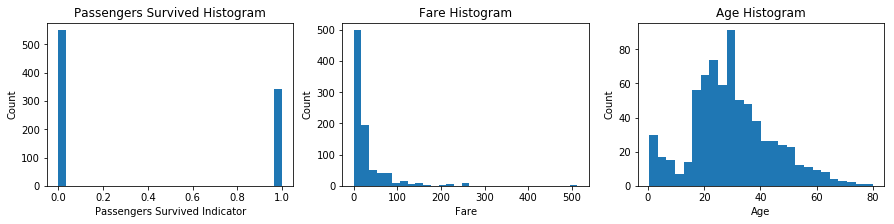

In [30]:
fig = plt.figure(figsize=(15,3))
plot_info = [(data_dict_columns['Survived'], 'Passengers Survived Histogram', 'Passengers Survived Indicator', 'Count'), 
    (data_dict_columns['Fare'], 'Fare Histogram', 'Fare', 'Count'), 
    (data_dict_columns['Age'], 'Age Histogram', 'Age', 'Count')]

for i, (data_list, title, x_label, y_label) in enumerate(plot_info):
    temp_data = valid_data(data_list)  # Removes null and invalid data values such as -1 
    
    bin_size = int(np.sqrt(len(temp_data)))
    fig.add_subplot(1,3,1+i)
    plt.hist(temp_data, bins=bin_size)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

### B) for each of these values, what's the 90% confidence interval of the population mean?

* Create a function to find the confidence interval, and use it on each of the numeric columns.
* What's your interpretation of the interval?

In [31]:
from scipy import stats

def standard_error(dist):
    return this_std(dist) / np.sqrt(len(dist))

def zscore_from_confidence(conf):
    alpha = 1-conf
    half_alpha = alpha / 2
    return stats.norm.ppf(half_alpha)

def confidence_interval_of_mean(distribution, confidence):
    lower_bound = this_mean(distribution) + zscore_from_confidence(confidence) * standard_error(distribution)
    upper_bound = this_mean(distribution) - zscore_from_confidence(confidence) * standard_error(distribution)
    return lower_bound, upper_bound

for element in ['Survived', 'Fare', 'Age']:
    temp_data = valid_data(data_dict_columns[element]) # Removes null and invalid data values such as -1
    print('The 90% confidence interval of', element, 'data =', confidence_interval_of_mean(temp_data, .9))


The 90% confidence interval of Survived data = (0.3570399183831679, 0.41063684929359973)
The 90% confidence interval of Fare data = (29.467405089819053, 34.941010847330148)
The 90% confidence interval of Age data = (28.8055350160034, 30.59270027811424)


# 13. Pandas

### A: Load the titanic csv into a `DataFrame` using `pd.read_csv()`

In [32]:
import pandas as pd

In [33]:
titanic_df = pd.read_csv('titanic.csv')

### B: Display the first 5 rows, the last 4 rows, and a sample of 3 rows.

In [34]:
titanic_df.head() # First 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
titanic_df.tail(4) # Last 4 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [36]:
np.random.seed(42)
titanic_df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S


### C: Create a row mask that is `True` when `Pclass == 3`. Use this to mask your `DataFrame`. Find the mean of the `Survived` column. Is it the same as what we calculated in part 10?

#### <font color='green'>Andy's response: This is the same mean that was calculated in part 10.

In [37]:
titanic_df_surv_pclass3 = titanic_df.copy()
pclass3_mask = titanic_df_surv_pclass3['Pclass'] == 3
survived_mask = titanic_df_surv_pclass3['Survived'] == 1

titanic_df_surv_pclass3['Survived_Pclass3'] = (pclass3_mask & survived_mask)
titanic_df_surv_pclass3['Survived_Pclass3'].mean()

0.13355780022446689

### D: Using a `.groupby()`, what is the mean of the survival column grouped by `Pclass` and `Sex`. What are your observations?

#### <font color='green'> Andy's response: For each sex, survival rate increases as Pclass value decreases.  In addition, across all Pclass values, more women than men survived.

In [38]:
titanic_df_grouped = titanic_df.groupby(['Pclass', 'Sex'])
titanic_df_grouped.mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

### E: Survival Rate by Age Range:  `pd.cut()` takes two arguments: A `list`, `Series`, or `array`, and a list of bins. Create a new column in your `DataFrame` using `pd.cut()` that groups your ages into bins of 5 years. Then, use `.groupby()` to display the survival rate and count for each age group

In [39]:
import numpy as np

def valid_data_pd(df, col):
    valid_mask = np.isnan(df[col]) == False
    invalid_mask = np.isnan(df[col]) == True
    
    temp_df_valid_mask = df[valid_mask].copy()
    temp_df_invalid_mask = df[invalid_mask].copy()
        
    return temp_df_valid_mask, temp_df_invalid_mask


def bin_cut(s, bin_size):
    s_min = int(s.min())
    s_max = int(s.max())
    
    bin_num = s_min
    bin_sequence = []
    while bin_num <= s_max:
        bin_sequence.append(bin_num)
        bin_num += bin_size
    
    return bin_sequence

In [40]:
titanic_df_valid_age, titanic_df_no_age = valid_data_pd(titanic_df, 'Age')

titanic_df_valid_age['Age_Bin'] = pd.cut(titanic_df_valid_age['Age'], bins=bin_cut(titanic_df_valid_age['Age'], 5))
titanic_df_no_age['Age_Bin'] = 'No age data'

titanic_df_age = pd.concat([titanic_df_valid_age, titanic_df_no_age])
age_group = titanic_df_age.groupby('Age_Bin')

for group_name, group_df in age_group:
    print("age group:", group_name)
    print("survival count:", group_df['Survived'].sum())
    print("survival rate:", group_df['Survived'].mean())
    print()

age group: (0, 5]
survival count: 31
survival rate: 0.704545454545

age group: (10, 15]
survival count: 11
survival rate: 0.578947368421

age group: (15, 20]
survival count: 33
survival rate: 0.34375

age group: (20, 25]
survival count: 42
survival rate: 0.344262295082

age group: (25, 30]
survival count: 42
survival rate: 0.388888888889

age group: (30, 35]
survival count: 41
survival rate: 0.465909090909

age group: (35, 40]
survival count: 28
survival rate: 0.417910447761

age group: (40, 45]
survival count: 17
survival rate: 0.36170212766

age group: (45, 50]
survival count: 16
survival rate: 0.410256410256

age group: (5, 10]
survival count: 7
survival rate: 0.35

age group: (50, 55]
survival count: 10
survival rate: 0.416666666667

age group: (55, 60]
survival count: 7
survival rate: 0.388888888889

age group: (60, 65]
survival count: 4
survival rate: 0.285714285714

age group: (65, 70]
survival count: 0
survival rate: 0.0

age group: (70, 75]
survival count: 0
survival rate: 0.0

# 14. Hypothesis Testing

### A) Hypothesis:

Create a null and alternate hypothesis to ask the following quesiton: Was the `Age` of survivors different from that of people who didn't survive?

**Hypotheses:**

<font color='green'>$H_0$: The mean difference between the age of survivors and age of non-survivors is zero.

$H_1$: The mean difference between the age of survivors and age of non-survivors is different than zero.

### B) T-Testing

Use a t-test to test your null hypothesis. What's the p-value? What's your interpretation? Do you accept or reject your null hypothesis? What does this mean in terms of `Age`?

<font color='green'> ** Andy's response: Based on the p-value of approximately 0.04, the sample data set is unlikely, assuming the null hypothesis is true.  Therefore, $H_0$ can be rejected.  and it can be concluded that the mean difference between the age of survivors and age of non-survivors is different than zero.  **

In [41]:
survived_mask = titanic_df_valid_age['Survived'] == 1
not_survived_mask = titanic_df_valid_age['Survived'] != 1

titanic_survived_df = titanic_df_valid_age[survived_mask]
titanic_not_survived_df = titanic_df_valid_age[not_survived_mask]

titanic_survived_np = np.array(titanic_survived_df['Age'])
titanic_not_survived_np = np.array(titanic_not_survived_df['Age'])

In [42]:
ttest = stats.ttest_ind(titanic_survived_np, titanic_not_survived_np)
ttest

Ttest_indResult(statistic=-2.0666869462538102, pvalue=0.039124654013482488)

# 13. Write-up

Use markdown cells to answer the following questions:

1. What is the main difference between a list and a tuple?
2. Can you iterate over a dictionary? If so, how?
3. What is the term for a list or array of `True` and `False` values used to select certain rows or columns in a `DataFrame`?
4. If you have a continuous variable, when would the median be a better descriptor than the mean? Why?
5. Give a qualitative description of the survivors of the titanic based on the effects of your splits in the data on survival rate. Or, given a row, what columns would you look at to guess if they survived?


<font color='green'> ** Andy's responses: **

** 1. Both a tuple and list are a collection of values.  A tuple's values can have different types and order does not matter, whereas in a list, order matters and its value are usually of the same type. **

** 2. It is possible to iterate over a dictionary using the .items() method, which returns each key and its values.  **

** 3. Mask **

** 4. Median would be a better descriptor than the mean when there are outliers that skew the distribution left or the right.  In these cases, median is likelier to fall into the middle of the distribution.  **

** 5. As the Pclass value decreases, the likelihood of survival increases.  In addition, women were more likely to survive than men. **

# 14. Evaluation

Please use markdown cells to submit your responses. 

1. What was easy for you in this project?
2. What was difficult?
3. Where did you make the most improvement?
4. Where would you like to improve?

<font color='green'> ** Andy's responses: **

** 1. This project was challenging, but reinforced the concepts covered so far. **

** 2. Changing dictionary format was most difficult. **

** 3. I was able to improve my knowledge of syntax without referring to my notes. **

** 4. I'd like to familiarize myself with more plotting.  **